O conjunto escolhido para a primeira parte da prática foi o Titanic, que pode ser visualizado rodando o código abaixo:

In [6]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt

titanic = pd.read_csv("./datasets/titanic/train.csv")
df = pd.DataFrame(data=titanic)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1- Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.

In [2]:
titanic.isna().sum() / len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Coluna Cabin tem muita taxa de NA

2- Argumente se você acha que esses problemas têm origem sistemática ou aleatória.

Embarked pode ter origem aleátoria, já os NA's da coluna Cabin e Age pode ser sistemático, provavelmente por falta dessa informação.

3- Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.

In [3]:
# Removendo colula Cabin
titanic.drop(['Cabin'], inplace=True, axis=1)

Removendo linhas com NA

In [4]:
titanic_dropna = titanic.copy()
titanic_dropna.dropna(axis=0, how='any', inplace=True)
titanic_dropna.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Substituindo NA por zero

In [5]:
titanic_fill_zero = titanic.copy()
titanic_fill_zero.fillna(value=0, axis=0, inplace=True)
titanic_fill_zero.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Substituindo NA por média, e coluna Embarked por moda pois não é numérica

In [6]:
titanic_fill_mean = titanic.copy()
titanic_fill_mean.fillna(value=titanic.mean(), axis=0, inplace=True)
titanic_fill_mean.fillna(value=titanic.mode(axis=0).iloc[0, :], axis=0, inplace=True)
titanic_fill_mean.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Substituindo NA por mediana, e coluna Embarked por moda pois não é numérica

In [7]:
titanic_fill_median = titanic.copy()
titanic_fill_median.fillna(value=titanic.median(), axis=0, inplace=True)
titanic_fill_median.fillna(value=titanic.mode(axis=0).iloc[0, :], axis=0, inplace=True)
titanic_fill_median.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

4- Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.

In [7]:
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std

# Mudando genero para atributo numerico
def map_gender(data):
    ret = data.copy()
    m = {'male' : 0, 'female' : 1}
    ret['Sex'] = ret['Sex'].str.lower().map(m)
    return ret

def classifica(data):
    data = map_gender(data)
    target = 1
    columns = [2, 4, 5, 6, 7, 9]
    print("Target: ", data.columns[target], "\nColumns: ", data.columns[columns])
    reg_clas(data, columns, target, regression=False)

def reg_clas(data, columns, target, regression=False):
    """
    Executa classificação ou regressão do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    regression: Boleano. True para realizar uma regressão e False para classificação
    ---------------------------------------------------------------
    Realiza a classificação/regressão em 4 modelos (SVM com kernel linear, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, e knn com k=5)
    Plot o gráfico de desempenho para cada classificador/regressor.
    Retorna um dicionário com os classificadores/regressores treinados e as medidas de desempenho
    """
    
    # inicializa os modelos com os parâmetros solicitados
    if regression:
        svm_l = SVR(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVR(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeRegressor(criterion='mse', splitter='best', min_samples_split=int(len(data)*0.05))
        knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    else:
        svm_l = SVC(C=10*len(data), kernel='linear', cache_size=500, max_iter=1e6)
        svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
        dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
        knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree')
    
    clfs = [svm_l, svm_n, dt, knn]
    clfs_names = ['svm_linear', 'svm_poly', 'dt', 'knn']
    
    # prepara validação cruzada
    # faz divisão do dataset em 5 partes
    cv = KFold(n_splits=5, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'svm_linear':[], 'svm_poly':[], 'dt':[], 'knn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # realiza predição no conjunto de teste e salva o resultado
            if regression:
                results[c_name].append( mean_squared_error(clf.predict(x_test), y_test) )
            else:
                results[c_name].append( clf.score(x_test, y_test) )
    
    # faz o plot de desempenho dos classificadores/regressores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos regressores - erro quadrático médio' if regression else \
            'Desempenho dos classificadores - acurácia'
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

O classificador não rodou para os dados originais devido à presenca de valores NA

In [9]:
classifica(titanic)

Target:  Survived 
Columns:  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Classificar dados com NA removidos

classifica(titanic_dropna)

Classificar dados com NA substituido por zero

Target:  Survived 
Columns:  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


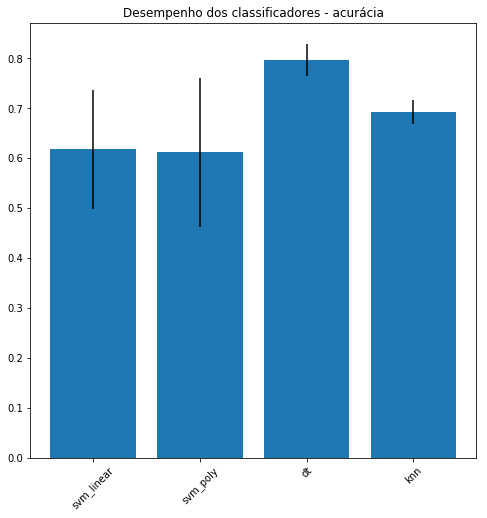

In [10]:
classifica(titanic_fill_zero)

Classificar dados com NA substituido pela média

Target:  Survived 
Columns:  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


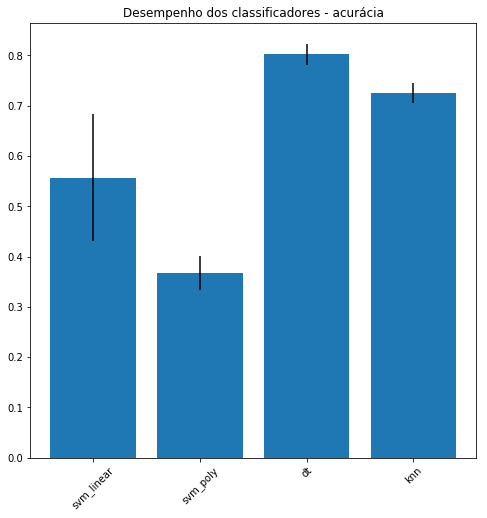

In [11]:
classifica(titanic_fill_mean)

Classificar dados com NA substituido pela mediana

Target:  Survived 
Columns:  Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


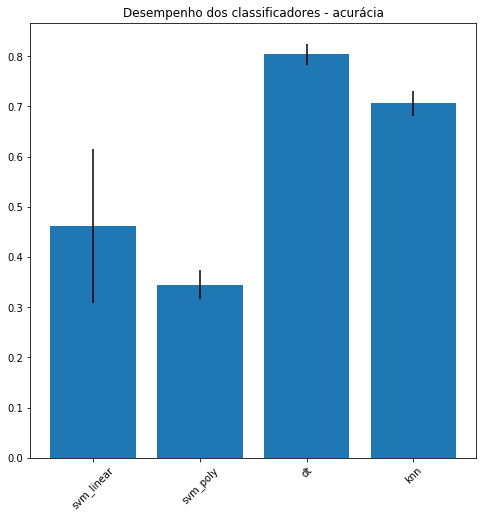

In [12]:
classifica(titanic_fill_median)

O segundo conjunto de dados escolhido foi o Instituições de Ensino Básico, que pode ser visualizado a seguir:

In [8]:
inst_ens = pd.read_csv("./datasets/instituicoes_ensino_basico/CADASTRO_MATRICULAS_REGIAO_SUDESTE_SP_2012.csv", 
                       encoding="ISO-8859-1", sep=";", engine="python", header=11, skipfooter=2)
df = pd.DataFrame(data=inst_ens)
df

,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
0,2012,35000012,AYRES DE MOURA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,6,1,6,0,0,0,0,0,0,0
1,2012,35000024,GAVIAO PEIXOTO BRIGADEIRO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,21,1,21,0,0,0,0,0,0,0
2,2012,35000036,JOAO SOLIMEO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,27,1,27,0,0,0,0,0,0,0
3,2012,35000048,WALFREDO ARANTES CALDAS PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,8,1,8,0,0,0,0,0,0,0
4,2012,35000059,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,5,1,5,0,0,0,0,0,0,0
5,2012,35000061,SUZANA DE CAMPOS DONA,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,9,1,9,0,0,0,0,0,0,1
6,2012,35000073,JULIO DE FARIA E SOUZA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
7,2012,35000085,JULIO CESAR DE OLIVEIRA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,30,1,30,0,0,0,0,0,0,1
8,2012,35000097,RENATO DE ARRUDA PENTEADO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,4,1,4,0,0,0,0,0,0,1
9,2012,35000103,JOAO BOEMER JARDIM PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,7,1,7,0,0,0,0,0,0,1


Devido ao grande número de colunas desse conjunto de dados, reduzimos para as colunas utilizadas nos exercícios anteriores.

In [26]:
columns = ['REDE', 'Localizacao', 'NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES']
data = inst_ens[columns]
data

,REDE,Localizacao,NUM_SALAS_EXISTENTES,NUM_FUNCIONARIOS,NUM_COMPUTADORES
0,Pública,Urbana,23.0,77.0,27
1,Pública,Urbana,108.0,191.0,30
2,Pública,Urbana,23.0,135.0,23
3,Pública,Urbana,22.0,119.0,7
4,Pública,Urbana,12.0,79.0,23
5,Pública,Urbana,16.0,64.0,21
6,Pública,Urbana,16.0,42.0,19
7,Pública,Urbana,14.0,52.0,20
8,Pública,Urbana,22.0,110.0,5
9,Pública,Urbana,16.0,72.0,21


Analisando-se os histogramas do exercício anterior percebe-se outliers na coluna NUM_FUNCIONARIOS e NUM_COMPUTADORES. Substituimos por NaN

In [27]:
data.NUM_FUNCIONARIOS[data.NUM_FUNCIONARIOS > 300] = np.NaN
data.NUM_COMPUTADORES[data.NUM_COMPUTADORES > 500] = np.NaN
data.max()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/li

REDE                    Pública
Localizacao              Urbana
NUM_SALAS_EXISTENTES        125
NUM_FUNCIONARIOS            300
NUM_COMPUTADORES            500
dtype: object

1- Reportar porcentagem de amostras com problema. Definir o que é problema no seu cenário. Problema pode ser valor ausente, inconsistente, ou outras formas que você acredita ser um problema. Especificar o problema por atributo, se você identificou problema nos atributos A e C, reportar a porcentagem de problema para cada um desses atributos.

In [28]:
data.isna().sum() / len(inst_ens)

REDE                    0.000000
Localizacao             0.000000
NUM_SALAS_EXISTENTES    0.090022
NUM_FUNCIONARIOS        0.090827
NUM_COMPUTADORES        0.000741
dtype: float64

2- Argumente se você acha que esses problemas têm origem sistemática ou aleatória.

Os problemas parecem ter origem sistemática, aparentam ser erros de input ou contagem. Pode haver o erro de mais de uma unidade de uma escola ter sido considerada como uma.

3- Realize uma etapa de limpeza que você achar necessária. Comente as etapas realizadas. Por limpeza vide as atividades nos slides 13 em diante. Você pode achar apenas necessário fazer imputação dos dados ou então se forem poucas amostras com valores ausentes, remover essas amostras, mas sempre justifique o porque você fez isso.

Removendo linhas com NA

In [29]:
data_dropna = data.copy()
data_dropna.dropna(axis=0, how='any', inplace=True)
data_dropna.isna().sum()

REDE                    0
Localizacao             0
NUM_SALAS_EXISTENTES    0
NUM_FUNCIONARIOS        0
NUM_COMPUTADORES        0
dtype: int64

Devido ao grande conjunto de linhas (mais de 30000) reduziremos para 1000 linhas pois os classificadores estavam demorando muito para convergir. Então a melhor escolha para filtragem de valores invalidos é a remoção seguida da escolha de 1000 linhas aleatórias, substituição não faz sentido pois temos muitos dados e podemos perder alguns.

In [33]:
data_dropna.shape

(28221, 5)

In [38]:
data = data_dropna.sample(1000)
data

,REDE,Localizacao,NUM_SALAS_EXISTENTES,NUM_FUNCIONARIOS,NUM_COMPUTADORES
6220,Pública,Rural,4.0,6.0,0.0
20959,Privada,Urbana,8.0,22.0,7.0
4062,Pública,Urbana,8.0,35.0,21.0
20469,Pública,Urbana,2.0,2.0,0.0
24333,Privada,Urbana,9.0,20.0,4.0
19138,Pública,Urbana,1.0,3.0,0.0
1016,Pública,Urbana,10.0,34.0,13.0
11683,Privada,Urbana,7.0,25.0,12.0
30794,Pública,Urbana,18.0,125.0,28.0
6562,Pública,Urbana,4.0,28.0,31.0


Substituindo NA por mediana. Não precisa de moda pois REDE e Localizacao já estão completamente preenchidas

4- Execute a função com os classificadores ou regressores, dependendo do seu problema, antes e depois da limpeza dos dados. Comente se o classificador conseguiu executar antes da limpeza ser realizada, e se houve melhora no desempenho.

In [41]:
# remapeamento da coluna REDE e Localizacao para valores numericos
def remap(data):
    ret = data.copy()
    m_REDE = {'privada' : 0, 'pública' : 1}
    m_Localizacao = {'rural' : 0, 'urbana' : 1}
    ret['REDE'] = ret['REDE'].str.lower().map(m_REDE)
    ret['Localizacao'] = ret['Localizacao'].str.lower().map(m_Localizacao)
    return ret

def classifica_REDE(data):
    data = remap(data)
    target = 0
    columns = [2, 3, 4]
    print("Target: ", data.columns[target], "\nColumns: ", data.columns[columns])
    reg_clas(data, columns, target, regression=False)
    
def classifica_Localizacao(data):
    data = remap(data)
    target = 1
    columns = [2, 3, 4]
    print("Target: ", data.columns[target], "\nColumns: ", data.columns[columns])
    reg_clas(data, columns, target, regression=False)

**Classificando com target REDE**

Target:  REDE 
Columns:  Index(['NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES'], dtype='object')


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


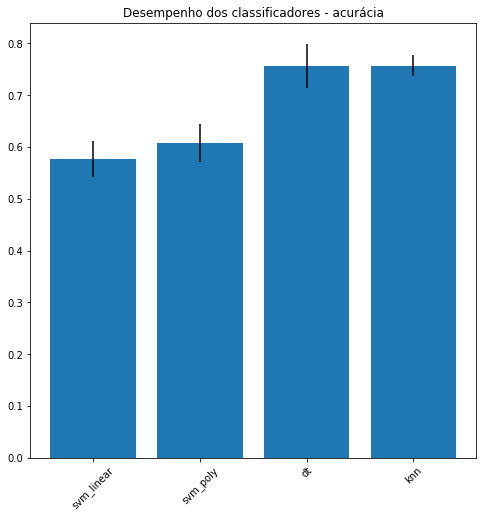

In [42]:
classifica_REDE(data)

**Classificando com target Localizacao**

Target:  Localizacao 
Columns:  Index(['NUM_SALAS_EXISTENTES', 'NUM_FUNCIONARIOS', 'NUM_COMPUTADORES'], dtype='object')


/usr/local/lib/python3.5/dist-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


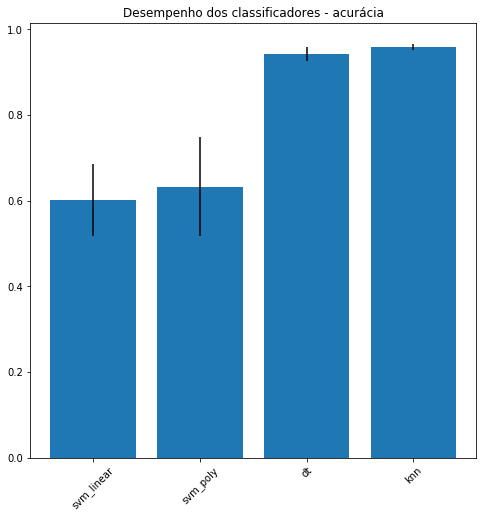

In [43]:
classifica_Localizacao(data)